In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from pricing.rfsv import UncorrelatedRFSV
from pricing.price_engine import MontelCarloOptionPricingEngine

In [4]:
rfsv = UncorrelatedRFSV()
rfsv_params = {
    'mu': 0.05,
    'h2': 0.14,

    'x0': -5,
    'x_mr': 5e-4,
    'x_mu': -5,
    'x_vol': 0.3
}
rfsv.set_parameters(**rfsv_params)

UncorrRFSV: Simulating  99.00% dwh


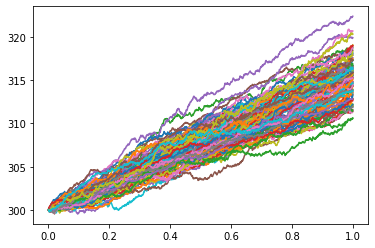

In [6]:
paths = rfsv.simulate(300, 1, 1001, sim_num=100, return_path=True)
for p in paths:
    plt.plot(np.linspace(0, 1, 1001), p)
plt.show()

UncorrRFSV: Simulating  99.00% dwh


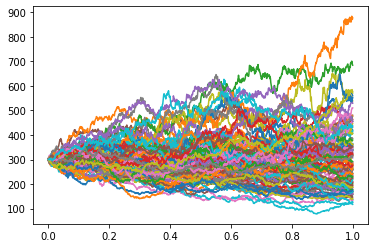

In [8]:
rfsv_params = {
    'mu': 0.05,
    'h2': 0.14,

    'x0': -1,
    'x_mr': 5e-4,
    'x_mu': -1,
    'x_vol': 0.3
}
rfsv.set_parameters(**rfsv_params)
paths = list()
paths = rfsv.simulate(300, 1, 1001, sim_num=100, return_path=True)
for p in paths:
    plt.plot(np.linspace(0, 1, 1001), p)
plt.show()

In [58]:
from pricing.price_engine import find_implied_vol

In [54]:
log_strike_prices = np.linspace(-0.3, 0.15, 10)

In [56]:
S = 100
K = np.exp(log_strike_prices) * S
K

array([ 74.08182207,  77.88007831,  81.87307531,  86.07079764,
        90.4837418 ,  95.12294245, 100.        , 105.12710964,
       110.51709181, 116.18342427])

In [62]:
from pricing.heston import Heston

r = 0.05
T = 1
params = {
    'mu': r,
    'corr': 0.02,

    'v0': 0.0225,
    'v_mr': 2,
    'v_mu': 0.0225,
    'v_vol': 0.3
}

heston = Heston()
pricer = MontelCarloOptionPricingEngine(heston)

price = pricer.european_call_option_price(S, K[0], r=r,
    T=T, size=1001, batch_sim_num=10000, batch_num=10,
    **params)
print(f'Price: {price}')
vol = find_implied_vol(S, K[0], T, r, price)
print(f'Implied vol: {vol}')

Price: 29.65797369666321
Implied vol: 0.17553382471203224


In [65]:
prices = np.zeros(K.shape)
vols = np.zeros(K.shape)
for ind, k in enumerate(K):
    price = pricer.european_call_option_price(S, k, r=r,
        T=T, size=10001, batch_sim_num=10000, batch_num=10,
        **params)
    prices[ind] = price
    vols[ind] = find_implied_vol(S, k, T, r, price)

vols

Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%


array([0.17654155, 0.17106159, 0.15927311, 0.1549326 , 0.14996966,
       0.14344414, 0.14325784, 0.1430956 , 0.14456441, 0.14783661])

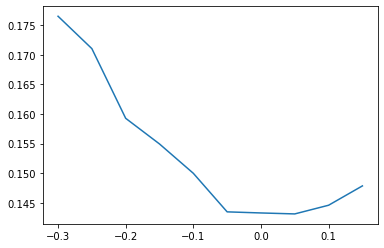

In [66]:
plt.plot(log_strike_prices, vols)

In [69]:
log_strike_prices = np.linspace(-0.3, 0.15, 50)
S = 100
K = np.exp(log_strike_prices) * S

r = 0.05
T = 1
rfsv_params = {
    'mu': 0.05,
    'h2': 0.14,

    'x0': -1,
    'x_mr': 5e-4,
    'x_mu': -1,
    'x_vol': 0.3
}

rfsv = UncorrelatedRFSV()
pricer = MontelCarloOptionPricingEngine(rfsv)

price = pricer.european_call_option_price(S, K[0], r=r,
    T=T, size=1001, batch_sim_num=10000, batch_num=1,
    **params)
print(f'Price: {price}')
vol = find_implied_vol(S, K[0], T, r, price)
print(f'Implied vol: {vol}')

Finsihed  100.00%
Price: 29.744082103418805
Implied vol: 0.19144595498671552


In [79]:
prices = np.zeros(K.shape)
rfsv_vols = np.zeros(K.shape)
for ind, k in enumerate(K):
    price = pricer.european_call_option_price(S, k, r=r,
        T=T, size=4096, batch_sim_num=10000, batch_num=10,
        **params)
    prices[ind] = price
    rfsv_vols[ind] = find_implied_vol(S, k, T, r, price)


Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%
Finsihed  100.00%


In [80]:
rfsv_vols

array([       nan, 0.15929673, 0.16135304, 0.13858353, 0.16846411,
       0.12661829, 0.15748726, 0.15227058, 0.14412127, 0.14282503,
       0.15787107, 0.15654481, 0.15892727, 0.15488349, 0.15462904,
       0.14810772, 0.14617541, 0.15237361, 0.14978963, 0.15145899,
       0.15161044, 0.15167693, 0.15257223, 0.15100879, 0.15040363,
       0.15100373, 0.15106748, 0.15106004, 0.15025237, 0.15225467,
       0.15141426, 0.15027485, 0.15210357, 0.15281847, 0.1519103 ,
       0.15000815, 0.15150456, 0.15208539, 0.15162948, 0.15104969,
       0.15201303, 0.15248503, 0.15100922, 0.15227646, 0.15271185,
       0.15174345, 0.1533633 , 0.15310422, 0.15157591, 0.15177635])

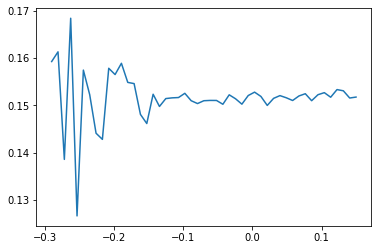

In [81]:
plt.plot(log_strike_prices, rfsv_vols)

In [87]:
from pricing.price_engine import MontelCarloOptionPricingEngine

r = 0.05
T = 1
params = {
    'mu': r,
    'corr': 0.02,

    'v0': 0.0225,
    'v_mr': 2,
    'v_mu': 0.0225,
    'v_vol': 0.3
}

heston = Heston()
pricer = MontelCarloOptionPricingEngine(heston)

implied_vols = pricer.find_implied_vols(S, K, r=r,
    T=T, size=10001, batch_sim_num=10000, batch_num=10,
    **params)


Finsihed  100.00%


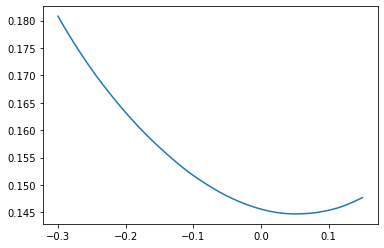

In [89]:
plt.plot(log_strike_prices, implied_vols)

In [92]:
from pricing.price_engine import MontelCarloOptionPricingEngine
from pricing.rfsv import RFSV

r = 0.05
T = 1
params = {
    'mu': r,
    'h2': 0.1,
    'corr': 0.02,

    'x0': np.log(0.15),
    'x_mr': 2,
    'x_mu': np.log(0.15),
    'x_vol': 0.25
}

rfsv = RFSV()
pricer = MontelCarloOptionPricingEngine(rfsv)

implied_vols = pricer.find_implied_vols(S, K, r=r,
    T=T, size=10001, batch_sim_num=10000, batch_num=10,
    **params)


Finsihed  100.00%


/home/chester/Documents/IC/FYP/FractionalBrownianMotion/pricing/price_engine.py:12: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
/home/chester/Documents/IC/FYP/FractionalBrownianMotion/pricing/price_engine.py:17: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S/K) + (sigma**2/2)*T) / (sigma*np.sqrt(T))


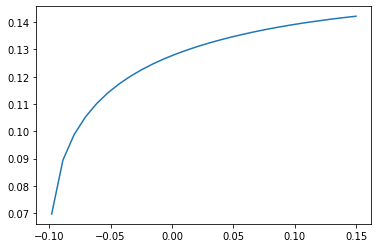

In [93]:
plt.plot(log_strike_prices, implied_vols)

In [94]:
implied_vols

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.06975115, 0.08948178, 0.09886495,
       0.10530559, 0.11021181, 0.11416096, 0.11743112, 0.12022214,
       0.12262948, 0.12474342, 0.12661683, 0.1282862 , 0.12979168,
       0.13116022, 0.13240764, 0.13355606, 0.1346103 , 0.13557816,
       0.13648307, 0.13731962, 0.13809652, 0.13882056, 0.13948844,
       0.14009933, 0.14067479, 0.14121972, 0.14171683, 0.14217455])